In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Introduction 

## 1.1 Understanding stock market

**1. Stock Market :**  
A Stock market or Share Market is the aggregation of buyers and sellers of stocks which represent ownership claims on business. Investment in the stock market is most often done via [stockbrokerages](https://en.wikipedia.org/wiki/Stockbroker) and [electronic trading platforms] (https://en.wikipedia.org/wiki/Electronic_trading_platform). Investments is usually made with an investment strategy in mind.

Every investor looks for a profit by buying stocks with low price and selling those stocks with high price. The price of stock usually depends on supply demand gap. Following points illustarate how the price of stocks changes.  
1. If more number of buyers want to buy a share than the more number of sellers selling, then sellers are in control then can fix the price of the stock.
2. If number of buyers are less than the number of sellers, then buyers are in control and the can fix the price.  

**2. Stock Index :**  
A Stock index or stock market index, is an index that measures a stock market or a subset of the stock market, that helps investors compare curretn price levels with past prices to calculate market performance.  

The major stock indices in usa are:  
a) [Nasdaq composite](https://en.wikipedia.org/wiki/NASDAQ_Composite)  
b) [S&p 500](https://en.wikipedia.org/wiki/S%26P_500_Index)  
c) [DJIA](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average)  

The major stock market indices in india are:  
a) [BSE Sensex](https://en.wikipedia.org/wiki/BSE_SENSEX)  
b) [NSE Nifty](https://en.wikipedia.org/wiki/NIFTY_50)  

You can understand more about stock market [here](https://www.youtube.com/watch?v=ZCFkWDdmXG8).  

### 1.2 Problem description

Every stock market index contains low, high, open, closing prices of every day stock prices.  
**LOW:** low indicates the lowest price of the stock on that day.  
**HIGH:** High indicates the highest price of the stock on that day.  
**Open:** Open indicates the opening price of the stock on that day.  
**Close:** Close indicates the closing price of the stock on that day.  

If closig price is greater than selling price then it means sellers are in control. Otherwise, buyers are in control.  

**The main objective in my problem is to forecast the closing price of a stock market index on next day.**  

In [4]:
#imports

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Input
from scipy import stats
# gloabl params for all matplotlib plots
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
os.listdir('../DataSet/S&P_500/raw_data/')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from tensorflow.keras.layers import Layer, LSTM, Dense, Bidirectional, Flatten
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K
import datetime

tf.random.set_seed(1)

# 2. Understanding Dataset

In [5]:
data_path = '../DataSet/'
raw_data = pd.read_csv(data_path + 'nasdaq/raw_data/finance.txt')
raw_data["Date"] = pd.to_datetime(raw_data["Date"])
print("Top 5 rows of the dataset:")
raw_data.head()

Top 5 rows of the dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-01-02,373.000000,373.500000,371.799988,372.200012,372.200012,92020000
1,1991-01-03,371.200012,371.799988,367.399994,367.500000,367.500000,108390000
2,1991-01-04,366.500000,367.899994,365.899994,367.200012,367.200012,103830000
3,1991-01-07,363.500000,365.799988,360.100006,360.200012,360.200012,109460000
4,1991-01-08,359.100006,360.500000,358.200012,359.000000,359.000000,111730000


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7424 non-null   datetime64[ns]
 1   Open       7424 non-null   float64       
 2   High       7424 non-null   float64       
 3   Low        7424 non-null   float64       
 4   Close      7424 non-null   float64       
 5   Adj Close  7424 non-null   float64       
 6   Volume     7424 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 406.1 KB


In [7]:
print("number of data points:", raw_data.shape[0])

number of data points: 7424


# 3. Descriptive Analysis

#### Displaying descriptive statistics of each variable  

In [8]:
for column in raw_data.columns:
    print("Descriptive statistics of " + column + ":")
    print(raw_data[column].describe())
    print('\n')

Descriptive statistics of Date:
count                    7424
unique                   7424
top       2017-08-21 00:00:00
freq                        1
first     1991-01-02 00:00:00
last      2020-06-19 00:00:00
Name: Date, dtype: object


Descriptive statistics of Open:
count     7424.000000
mean      2854.273284
std       2071.833698
min        354.899994
25%       1440.725036
50%       2238.505005
75%       3756.090027
max      10042.129883
Name: Open, dtype: float64


Descriptive statistics of High:
count     7424.000000
mean      2873.521296
std       2083.938531
min        357.399994
25%       1454.302521
50%       2256.135009
75%       3791.617493
max      10086.889648
Name: High, dtype: float64


Descriptive statistics of Low:
count    7424.000000
mean     2832.226635
std      2058.699329
min       353.000000
25%      1419.029999
50%      2218.710083
75%      3711.435059
max      9962.580078
Name: Low, dtype: float64


Descriptive statistics of Close:
count     7424.000000
mean

#### Displaying distribution of each variable  

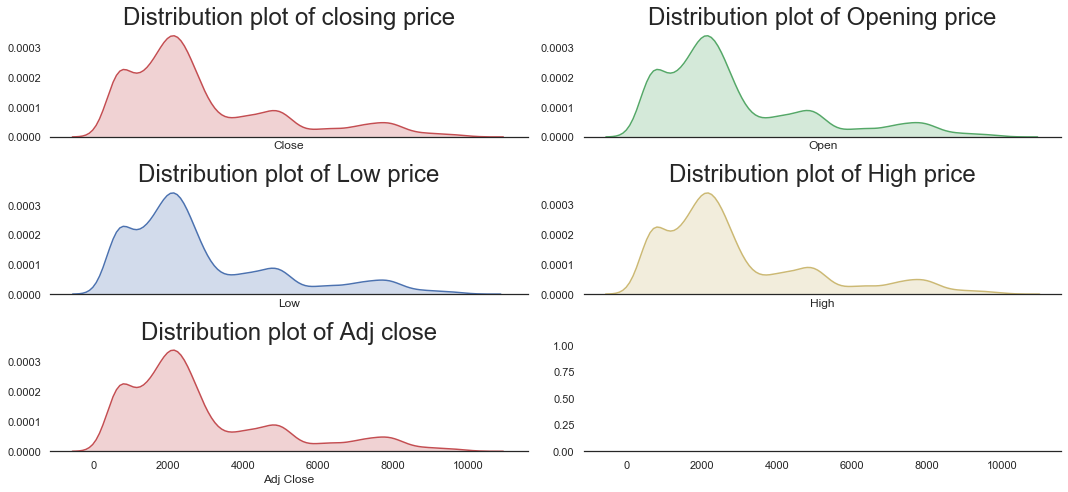

In [9]:
#https://seaborn.pydata.org/examples/distplot_options.html
sns.set(style="white", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(15, 7), sharex=True)

sns.despine(left=True)

sns.distplot(raw_data['Close'], hist=False, color="r",\
             kde_kws={"shade": True}, ax=axes[0, 0]).set_title("Distribution plot of closing price", size = 24)

sns.distplot(raw_data['Open'], hist=False, color = "g", \
             kde_kws={"shade": True}, ax=axes[0, 1]).set_title("Distribution plot of Opening price", size = 24)

sns.distplot(raw_data['Low'], hist=False, color="b", \
             kde_kws={"shade": True}, ax=axes[1, 0]).set_title("Distribution plot of Low price", size = 24)

sns.distplot(raw_data['High'], hist=False, color="y", \
             kde_kws={"shade": True}, ax=axes[1, 1]).set_title("Distribution plot of High price", size = 24)

sns.distplot(raw_data['Adj Close'], hist=False, color="r", \
             kde_kws={"shade": True}, ax=axes[2, 0]).set_title("Distribution plot of Adj close", size = 24)

plt.tight_layout()

#### Displaying log-transformation of each variable to check whether they follow normal distribution

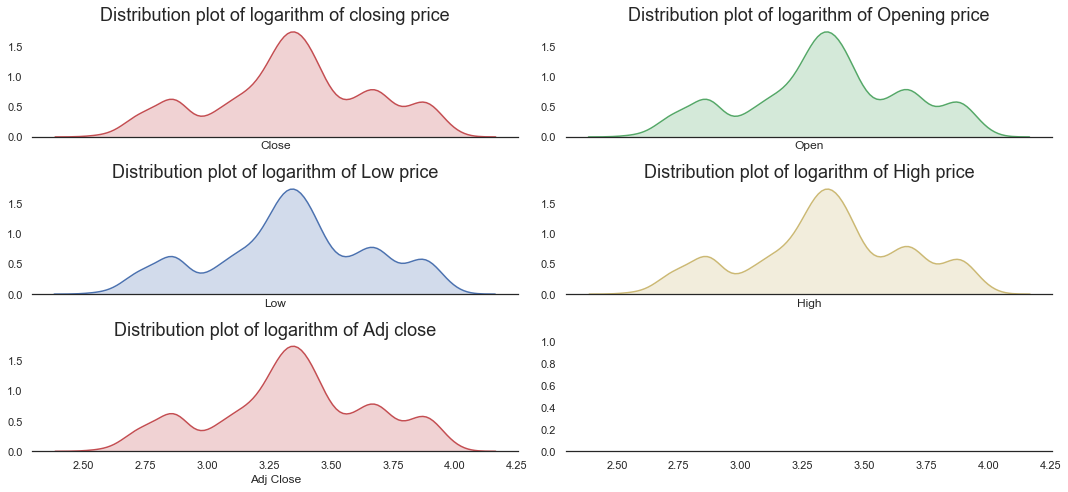

In [10]:
sns.set(style="white", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(15, 7), sharex=True)

sns.despine(left=True)

sns.distplot(np.log10(raw_data['Close']), hist=False, color="r",\
             kde_kws={"shade": True}, ax=axes[0, 0]).set_title("Distribution plot of logarithm of closing price", size = 18)

sns.distplot(np.log10(raw_data['Open']), hist=False, color = "g", \
             kde_kws={"shade": True}, ax=axes[0, 1]).set_title("Distribution plot of logarithm of Opening price", size = 18)

sns.distplot(np.log10(raw_data['Low']), hist=False, color="b", \
             kde_kws={"shade": True}, ax=axes[1, 0]).set_title("Distribution plot of logarithm of Low price", size = 18)

sns.distplot(np.log10(raw_data['High']), hist=False, color="y", \
             kde_kws={"shade": True}, ax=axes[1, 1]).set_title("Distribution plot of logarithm of High price", size = 18)

sns.distplot(np.log10(raw_data['Adj Close']), hist=False, color="r", \
             kde_kws={"shade": True}, ax=axes[2, 0]).set_title("Distribution plot of logarithm of Adj close", size = 18)

plt.tight_layout()

#### Observations

1. After observing the above plots it seems that the log transformation of each variable follows normal distribution in the range of 3.0 to 3.50. Let's look at by plotting qq plots.
2. Since distribution of every plot looks same. Let's do further analysis on closing price only.  


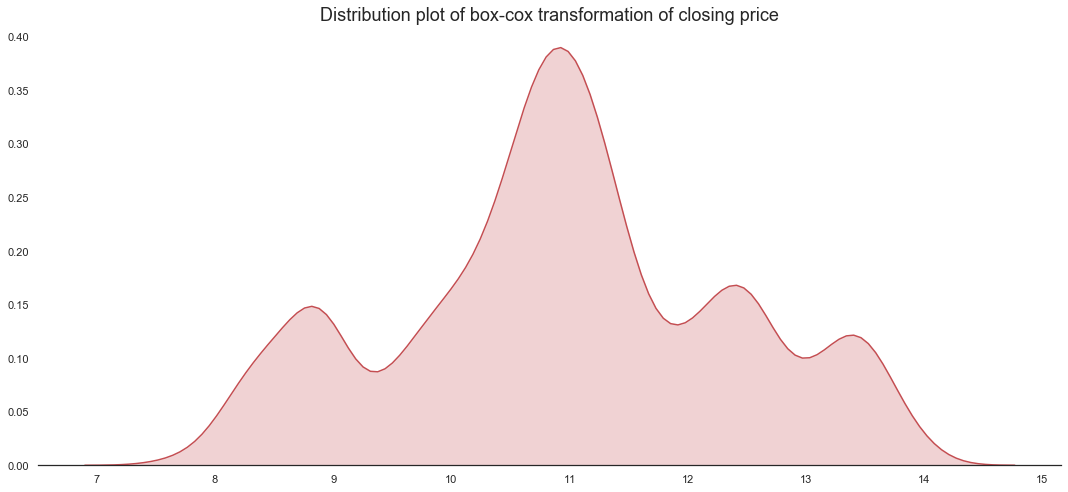

In [11]:
sns.set(style="white", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(15, 7), sharex=True)

sns.despine(left=True)

box_close, _ = stats.boxcox(raw_data['Close'])
sns.distplot(box_close, hist=False, color="r",\
             kde_kws={"shade": True}).set_title("Distribution plot of box-cox transformation of closing price", size = 18)
plt.tight_layout()

1. After observing the above plot it seems that the box-cox transformation of stock prices look alike log-transformation of stock prices.

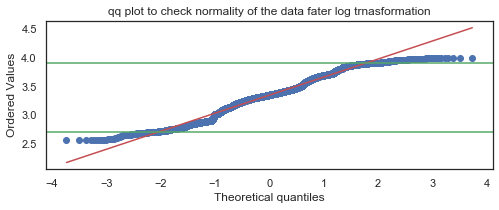

In [12]:
#Apply box cox transformation in python: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
#https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib

fig = plt.figure()
ax2 = fig.add_subplot(211)
xt = np.log10(raw_data['Close'])
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('qq plot to check normality of the data fater log trnasformation')
plt.axhline(y=2.7, color='g')
plt.axhline(y=3.9, color = 'g')
plt.show()

In [13]:
print("1. From the above plot it seems that the log transformation of prices between {} and \
{} follows normal distribution.".format(10 ** 2.7, 10 ** 3.9))

1. From the above plot it seems that the log transformation of prices between 501.18723362727246 and 7943.282347242814 follows normal distribution.


#### Displaying distribution of Volume variable

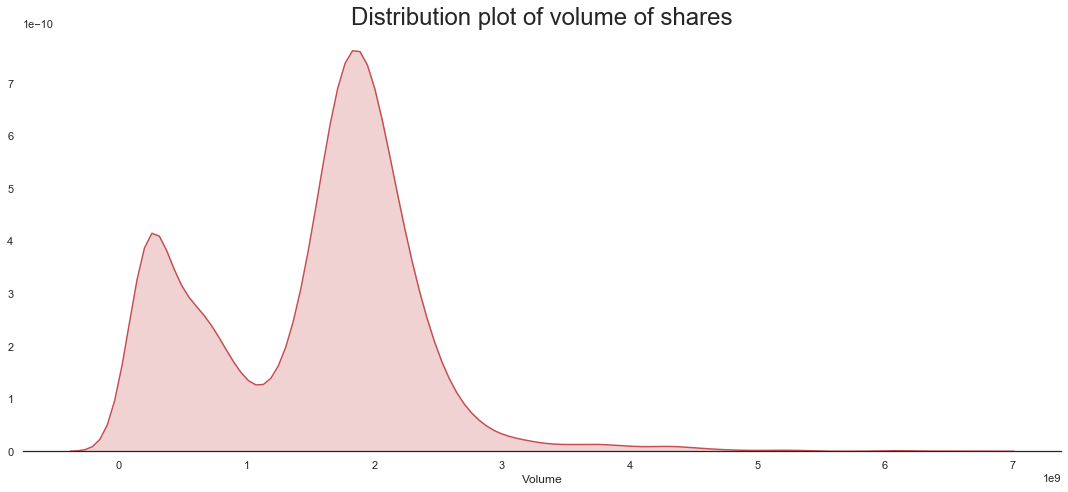

In [14]:
sns.set(style="white", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(15, 7), sharex=True)

sns.despine(left=True)

sns.distplot(raw_data['Volume'], hist=False, color="r",\
             kde_kws={"shade": True}).set_title("Distribution plot of volume of shares", size = 24)
plt.tight_layout()

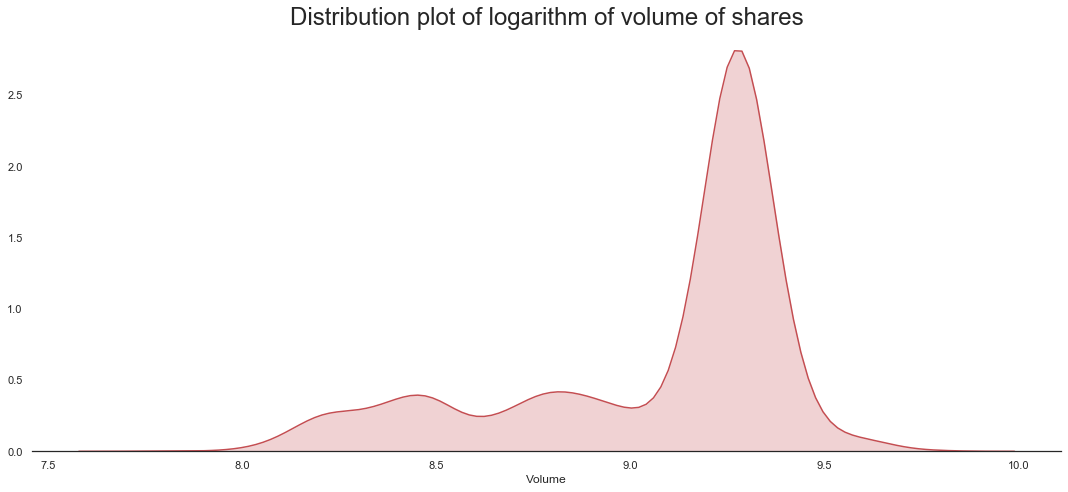

In [15]:
sns.set(style="white", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(15, 7), sharex=True)

sns.despine(left=True)

sns.distplot(np.log10(raw_data['Volume']), hist=False, color="r",\
             kde_kws={"shade": True}).set_title("Distribution plot of logarithm of volume of shares", size = 24)
plt.tight_layout()

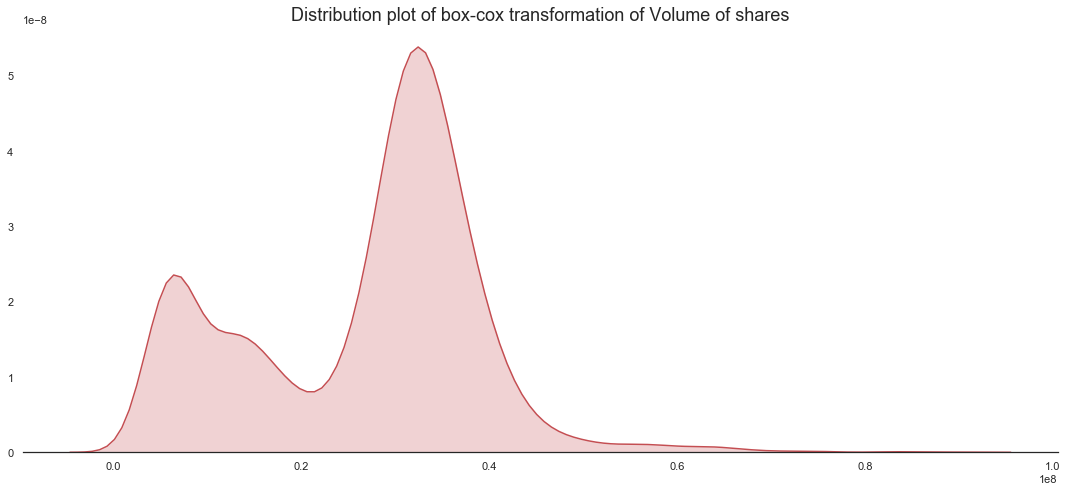

In [16]:
sns.set(style="white", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(15, 7), sharex=True)

sns.despine(left=True)

box_volume, _ = stats.boxcox(raw_data['Volume'])
sns.distplot(box_volume, hist=False, color="r",\
             kde_kws={"shade": True}).set_title("Distribution plot of box-cox transformation of Volume of shares", size = 18)
plt.tight_layout()

#### qq plots to check the normality of the transformations of the share volume

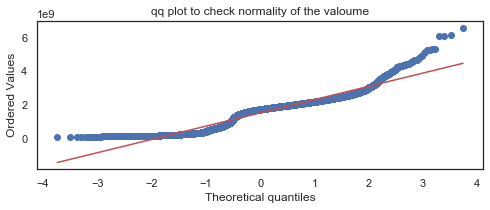

In [17]:
fig = plt.figure()
ax2 = fig.add_subplot(211)
xt = raw_data['Volume']
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('qq plot to check normality of the valoume')
plt.show()

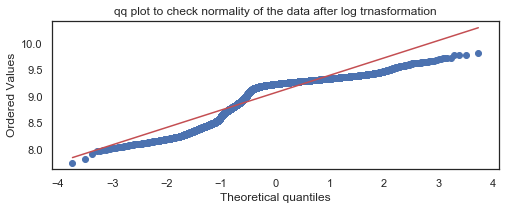

In [18]:
fig = plt.figure()
ax2 = fig.add_subplot(211)
xt = np.log10(raw_data['Volume'])
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('qq plot to check normality of the data after log trnasformation')
plt.show()

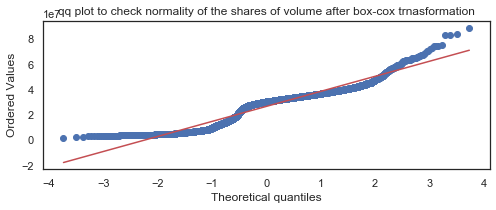

In [19]:
fig = plt.figure()
ax2 = fig.add_subplot(211)

xt = np.log10(raw_data['Volume'])
prob = stats.probplot(box_volume, dist=stats.norm, plot=ax2)
ax2.set_title('qq plot to check normality of the shares of volume after box-cox trnasformation')
plt.show()

1. After observing the above plots it seems that the volume of shares follow normal distribution in the range of 1e9 to 3e9.

## 3.1 Final results after descriptive analysis

1. We have data of 7424 days of nasdaq index.  
2. Distribution of closing, opening, High, Low, Adj closing price looks similar.  
3. logartihmic transformation of each of the above features seems to be normal.
4. Volume of shares itself seems normal compared to log-transform and box-cox transform. 

# 4. Exploratory analysis on raw data  

#### Exploring the time-series plots of each variable

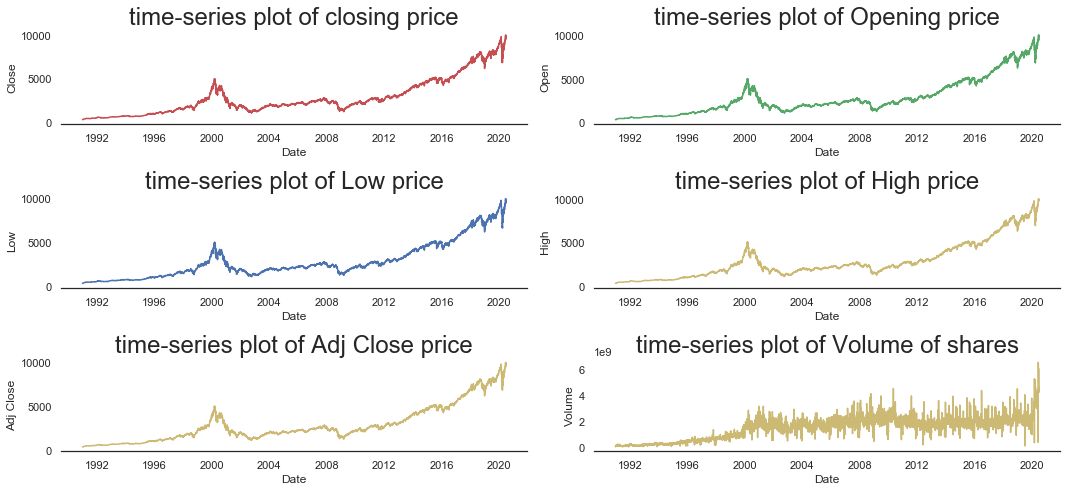

In [20]:
# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(15, 7))
sns.despine(left=True)

sns.lineplot(raw_data['Date'], raw_data['Close'], color="r", \
             ax=axes[0, 0]).set_title("time-series plot of closing price", size = 24)

sns.lineplot(raw_data['Date'], raw_data['Open'], color = "g", \
             ax=axes[0, 1]).set_title("time-series plot of Opening price", size = 24)

sns.lineplot(raw_data['Date'], raw_data['Low'], color="b", \
             ax=axes[1, 0]).set_title("time-series plot of Low price", size = 24)

sns.lineplot(raw_data['Date'], raw_data['High'], color="y", \
             ax=axes[1, 1]).set_title("time-series plot of High price", size = 24)

sns.lineplot(raw_data['Date'], raw_data['Adj Close'], color="y", \
             ax=axes[2, 0]).set_title("time-series plot of Adj Close price", size = 24)

sns.lineplot(raw_data['Date'], raw_data['Volume'], color="y", \
             ax=axes[2, 1]).set_title("time-series plot of Volume of shares", size = 24)

plt.tight_layout()

1. The above plots seem that they are non-stationary and most of the time it has positive trends.
2. In the year around 2000 it has sudden spike and decreased the stock prices and there also sudden decrease in the years 2009, 2019, 2020.
3. It seems that the volume of shares doesn't correlated with stock prices and also it seems it is stationary in most of the time.  

#### Exploring the correlation of each variable

In [22]:
#how to plot correlation matrix in python:https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
corr = raw_data.iloc[:, 1:].corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999924,0.999882,0.999812,0.999812,0.607226
High,0.999924,1.000000,0.999824,0.999887,0.999887,0.609620
Low,0.999882,0.999824,1.000000,0.999897,0.999897,0.604390
Close,0.999812,0.999887,0.999897,1.000000,1.000000,0.606949
Adj Close,0.999812,0.999887,0.999897,1.000000,1.000000,0.606949
Volume,0.607226,0.609620,0.604390,0.606949,0.606949,1.000000


1. From the above correlation map we can see that except with volume of shares every other fearures correlated with each other. 

# 5. Feature Engineering

In [23]:
#https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/

processed_data = raw_data.copy()
processed_data['year'] = processed_data["Date"].dt.year                     #generating year
processed_data['month'] = processed_data['Date'].dt.month                   #generating month
processed_data['day'] = processed_data['Date'].dt.day                       #genearating day
processed_data['dayofweek_num'] = processed_data['Date'].dt.dayofweek       #generating week day number
processed_data['dayofweek_name'] = processed_data['Date'].dt.day_name()     #generating week day name

processed_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,dayofweek_num,dayofweek_name
0,1991-01-02,373.000000,373.500000,371.799988,372.200012,372.200012,92020000,1991,1,2,2,Wednesday
1,1991-01-03,371.200012,371.799988,367.399994,367.500000,367.500000,108390000,1991,1,3,3,Thursday
2,1991-01-04,366.500000,367.899994,365.899994,367.200012,367.200012,103830000,1991,1,4,4,Friday
3,1991-01-07,363.500000,365.799988,360.100006,360.200012,360.200012,109460000,1991,1,7,0,Monday
4,1991-01-08,359.100006,360.500000,358.200012,359.000000,359.000000,111730000,1991,1,8,1,Tuesday


In [24]:
#Feature engineerng with lag features
processed_data['lag_1'] = processed_data['Close'].shift(1)

#extracting rolling window features using closing price
processed_data['rolling_close_mean'] = processed_data['Close'].rolling(window=10).mean()
processed_data['rolling_close_sum'] = processed_data['Close'].rolling(window = 10).sum()
processed_data['rolling_close_min'] = processed_data['Close'].rolling(window = 10).min()
processed_data['rolling_close_max'] = processed_data['Close'].rolling(window = 10).max()
processed_data['rolling_close_median'] = processed_data['Close'].rolling(window = 10).median()

#extracting rolling window features using opening price
processed_data['rolling_open_mean'] = processed_data['Open'].rolling(window=10).mean()
processed_data['rolling_open_sum'] = processed_data['Open'].rolling(window = 10).sum()
processed_data['rolling_open_min'] = processed_data['Open'].rolling(window = 10).min()
processed_data['rolling_open_max'] = processed_data['Open'].rolling(window = 10).max()
processed_data['rolling_open_median'] = processed_data['Open'].rolling(window = 10).median()

#extracting rolling window features using High price
processed_data['rolling_High_mean'] = processed_data['High'].rolling(window=10).mean()
processed_data['rolling_High_sum'] = processed_data['High'].rolling(window = 10).sum()
processed_data['rolling_High_min'] = processed_data['High'].rolling(window = 10).min()
processed_data['rolling_High_max'] = processed_data['High'].rolling(window = 10).max()
processed_data['rolling_High_median'] = processed_data['High'].rolling(window = 10).median()

#extracting rolling window features using Low price
processed_data['rolling_Low_mean'] = processed_data['Low'].rolling(window=10).mean()
processed_data['rolling_Low_sum'] = processed_data['Low'].rolling(window = 10).sum()
processed_data['rolling_Low_min'] = processed_data['Low'].rolling(window = 10).min()
processed_data['rolling_Low_max'] = processed_data['Low'].rolling(window = 10).max()
processed_data['rolling_Low_median'] = processed_data['Low'].rolling(window = 10).median()

#extracting rolling window features using adj close
processed_data['rolling_AdjClose_mean'] = processed_data['Adj Close'].rolling(window=10).mean()
processed_data['rolling_AdjClose_sum'] = processed_data['Adj Close'].rolling(window = 10).sum()
processed_data['rolling_AdjClose_min'] = processed_data['Adj Close'].rolling(window = 10).min()
processed_data['rolling_AdjClose_max'] = processed_data['Adj Close'].rolling(window = 10).max()
processed_data['rolling_Adjclose_median'] = processed_data['Adj Close'].rolling(window = 10).median()

#extracting rolling window features using volume of shares
processed_data['rolling_volume_mean'] = processed_data['Volume'].rolling(window=10).mean()
processed_data['rolling_volume_sum'] = processed_data['Volume'].rolling(window = 10).sum()
processed_data['rolling_volume_min'] = processed_data['Volume'].rolling(window = 10).min()
processed_data['rolling_volume_max'] = processed_data['Volume'].rolling(window = 10).max()
processed_data['rolling_volume_median'] = processed_data['Volume'].rolling(window = 10).median()


In [25]:
#generating whether the buyers or sellers are in control on each day
processed_data['control_stock'] = processed_data.apply(
    lambda x: 'sellersControl' if (x['Close'] > x['Open'])  else 'buyersControl' , axis = 1
    )      #generating control_stock column whcih gives whether buyers are in control or sellers are in control on each day

In [26]:
#extracting rolling window features using control_stock
processed_data['rolling_control_stock_mean'] = processed_data['control_stock'].replace(
    {'sellersControl': 1, 'buyersControl': 0}).rolling(window=10).mean()
processed_data['rolling_control_stock_sum'] = processed_data['control_stock'].replace(
    {'sellersControl': 1, 'buyersControl': 0}).rolling(window = 10).sum()

In [27]:
#storing the processed data in the local directory
outdir = data_path + 'nasdaq/processed_data'
outname = 'processed_finance.csv'
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, outname)
processed_data.to_csv(fullname)

# 6 Exploratory Analysis on processed data

#### plotting correlation heat map of every generated features to Closing price

In [28]:
processed_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'year',
       'month', 'day', 'dayofweek_num', 'dayofweek_name', 'lag_1',
       'rolling_close_mean', 'rolling_close_sum', 'rolling_close_min',
       'rolling_close_max', 'rolling_close_median', 'rolling_open_mean',
       'rolling_open_sum', 'rolling_open_min', 'rolling_open_max',
       'rolling_open_median', 'rolling_High_mean', 'rolling_High_sum',
       'rolling_High_min', 'rolling_High_max', 'rolling_High_median',
       'rolling_Low_mean', 'rolling_Low_sum', 'rolling_Low_min',
       'rolling_Low_max', 'rolling_Low_median', 'rolling_AdjClose_mean',
       'rolling_AdjClose_sum', 'rolling_AdjClose_min', 'rolling_AdjClose_max',
       'rolling_Adjclose_median', 'rolling_volume_mean', 'rolling_volume_sum',
       'rolling_volume_min', 'rolling_volume_max', 'rolling_volume_median',
       'control_stock', 'rolling_control_stock_mean',
       'rolling_control_stock_sum'],
      dtype='object')

In [29]:
#https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas
cols = [col for col in processed_data.columns if col not in ['Date', 'Open', \
                                                             'High', 'Low', 'Adj Close', \
                                                             'Volume', 'year', 'dayofweek_name', 'control_stock']]
corr = processed_data[cols].corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

#### Observations

1. From the above heat map we can see that Closing price is highly correlated with most of the columns except **month, day, dayofweek_num, rolling_control_stock_mean, rolling_control_stock_sum**.